# STOCK MARKET CLUSTERING

#### Introduction

In this project, we will be extracting live Stock Market data from yahoo finance. We will find similarities amongst various companies using their stock market prices and then cluster them into different clusters using the K-means algorithm.

Note that is an unsupervised machine learning problem and will use an unsupervised machine learning technique with the help of the K-means algorithm

#### NB
NB: “pandas_datareader” extract data from various Internet sources into a DataFrame. Currently, the following sources are supported:

    * Yahoo! Finance
    * Google Finance
    * St.Louis FED (FRED)
    * Kenneth French’s data library
    * World Bank
    * Google Analytics

### SCRIPT

#### Imports

In [2]:
from pyforest import *
lazy_imports()

['import numpy as np',
 'import skimage',
 'import seaborn as sns',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from scipy import signal as sg',
 'import sklearn',
 'from sklearn.impute import SimpleImputer',
 'from sklearn.model_selection import KFold',
 'from sklearn.cluster import KMeans',
 'import os',
 'from sklearn.linear_model import ElasticNetCV',
 'import bokeh',
 'import torch',
 'import tqdm',
 'from dask import dataframe as dd',
 'import dash',
 'from sklearn.linear_model import ElasticNet',
 'from sklearn.linear_model import Ridge',
 'from sklearn.model_selection import GridSearchCV',
 'import awswrangler as wr',
 'import statsmodels.api as sm',
 'from sklearn.linear_model import LassoCV',
 'from pyspark import SparkContext',
 'import keras',
 'import spacy',
 'import pandas as pd',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import xgboost as xgb',
 'import statistics',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.linear_model 

In [3]:
from pandas_datareader import data
import warnings
warnings.simplefilter('ignore')

#### Reading Data using DataReader

##### creating dictionary for different companies

In [4]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'Navient Corporation':'NAVI',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Alphabet Inc.':'GOOG',
    'Sony':'SONY',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'
}

In [5]:
data_source = 'yahoo'
start_date = '2015-04-25'
end_date = '2020-04-25'

df = data.DataReader(list(companies_dict.values()),data_source,start_date,end_date)
df.head()

Attributes   Adj Close                                                \
Symbols           AMZN       AAPL        WBA         NOC          BA   
Date                                                                   
2015-04-24  445.100006  29.647446  72.094765  146.085922  130.596771   
2015-04-27  438.559998  30.186777  72.212158  144.596008  130.068787   
2015-04-28  429.309998  29.711174  72.178635  144.939117  129.813538   
2015-04-29  429.369995  29.274237  70.912483  143.701996  128.616730   
2015-04-30  421.779999  28.480028  69.537315  139.096741  126.143806   

Attributes                                                           ...  \
Symbols            LMT        MCD       INTC       NAVI         IBM  ...   
Date                                                                 ...   
2015-04-24  165.383041  83.622566  26.913803  14.776813  128.493134  ...   
2015-04-27  164.087906  81.674690  27.266167  14.463499  129.212128  ...   
2015-04-28  164.240265  82.005005  27.702423  14.499929  131.626389  ...   
2015-04-29  161.929321  82.165901  27.593357  14.361488  131.989609  ...   
2015-04-30  157.959152  81.767868  27.308111  14.237616  129.635925  ...   

Attributes      Volume                                                         \
Symbols            JNJ        TM        HMC       GOOG       SONY         XOM   
Date                                                                            
2015-04-24   6566900.0  277500.0   824800.0  4932505.0  3291100.0   8405700.0   
2015-04-27   9113900.0  273000.0   557200.0  2398000.0  1472600.0  10534600.0   
2015-04-28   7484600.0  421900.0  2455300.0  1491000.0   957100.0   9633800.0   
2015-04-29   8926200.0  282900.0  1481400.0  1698800.0  1089200.0  12534100.0   
2015-04-30  10170600.0  246800.0   750000.0  2082200.0  1271100.0  13947700.0   

Attributes                                                 
Symbols           CVX        VLO           F          BAC  
Date                                                       
2015-04-24  4995000.0  5277700.0  20293300.0   40766100.0  
2015-04-27  4858700.0  8056400.0  34824900.0   73523400.0  
2015-04-28  5321600.0  7905400.0  56634200.0   58080100.0  
2015-04-29  5665800.0  6002600.0  35126900.0  134499400.0  
2015-04-30  6666800.0  8067500.0  30269300.0   78313900.0  

[5 rows x 162 columns]

There are stock price of different companies on specific days !

In [6]:
df.to_csv('datareader_yahoo_stock.csv',index = False)

#### EDA

In [7]:
df.isna().sum() # checking for null

Attributes  Symbols
Adj Close   AMZN       0
            AAPL       0
            WBA        0
            NOC        0
            BA         0
                      ..
Volume      XOM        0
            CVX        0
            VLO        0
            F          0
            BAC        0
Length: 162, dtype: int64

No null values !

##### Movement

Movement is the difference between opening and closing of stock prices of a particular day.Positive movement implies we should buy the stock and negetive imples we should sell the stock !

In [8]:
stock_open = np.array(df['Open']).T
stock_close = np.array(df['Close']).T

movements  = stock_close - stock_open

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
sum_of_movement = np.sum(movements,1) # sum of movements of different company for all days

<IPython.core.display.Javascript object>

In [10]:
for i in range(len(companies_dict)):
    print('Company : {} ,Change : {}'.format(df['High'].columns[i],sum_of_movement[i]))

Company : AMZN ,Change : -160.47024536132812
Company : AAPL ,Change : 45.97247505187988
Company : WBA ,Change : -37.489990234375
Company : NOC ,Change : 78.51982116699219
Company : BA ,Change : -74.28045654296875
Company : LMT ,Change : 45.6903076171875
Company : MCD ,Change : 50.8701171875
Company : INTC ,Change : 42.16000175476074
Company : NAVI ,Change : -14.180012226104736
Company : IBM ,Change : -11.749786376953125
Company : TXN ,Change : 46.83992385864258
Company : MA ,Change : 69.43009185791016
Company : MSFT ,Change : 32.16990280151367
Company : GE ,Change : -59.230506896972656
Company : AXP ,Change : -8.069831848144531
Company : PEP ,Change : 52.980125427246094
Company : KO ,Change : 13.529964447021484
Company : JNJ ,Change : 47.079856872558594
Company : TM ,Change : -52.01002502441406
Company : HMC ,Change : -21.430004119873047
Company : GOOG ,Change : 592.7963256835938
Company : SONY ,Change : -19.24006462097168
Company : XOM ,Change : -23.74008560180664
Company : CVX ,Chang

##### Apple vs Amazon open price

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

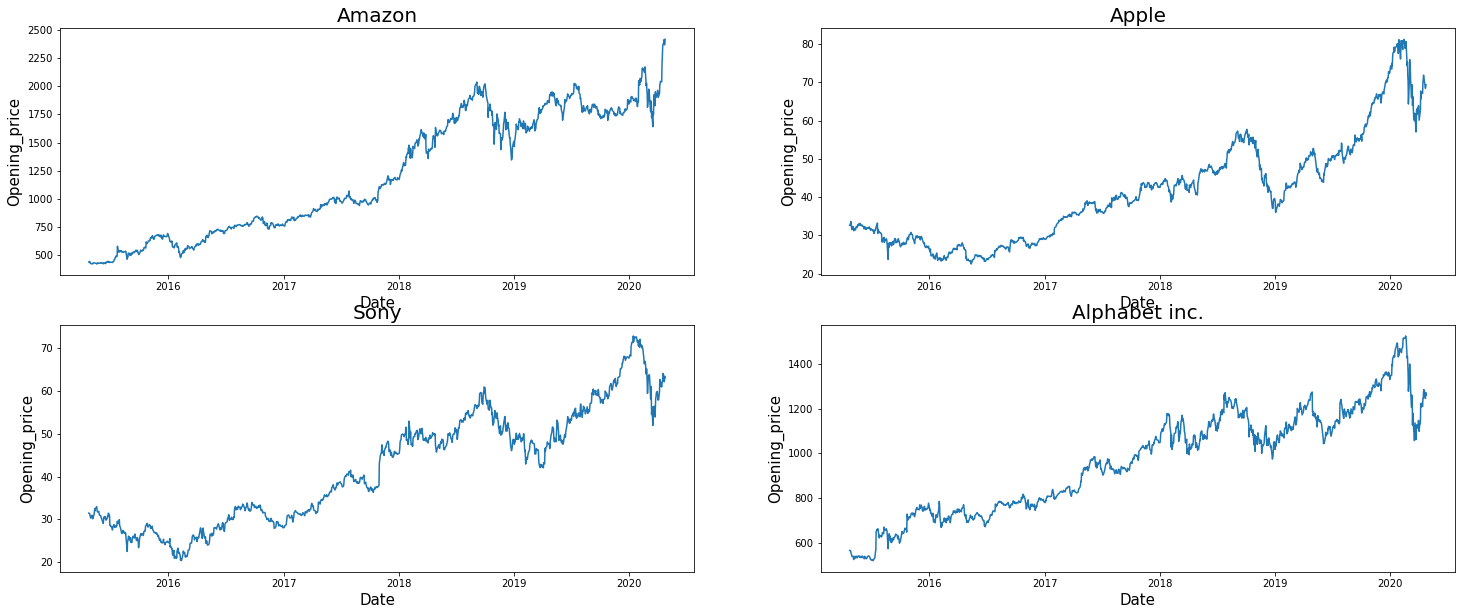

In [11]:
plt.figure(figsize = (25,10))

plt.subplot(2,2,1)
plt.title('Amazon',fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening_price',fontsize = 15)
plt.plot(df['Open']['AMZN'])

plt.subplot(2,2,2)
plt.title('Apple',fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening_price',fontsize = 15)
plt.plot(df['Open']['AAPL'])

plt.subplot(2,2,3)
plt.title('Sony',fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening_price',fontsize = 15)
plt.plot(df['Open']['SONY'])

plt.subplot(2,2,4)
plt.title('Alphabet inc.',fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening_price',fontsize = 15)
plt.plot(df['Open']['GOOG'])

##### Apple analysis for 100 days 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

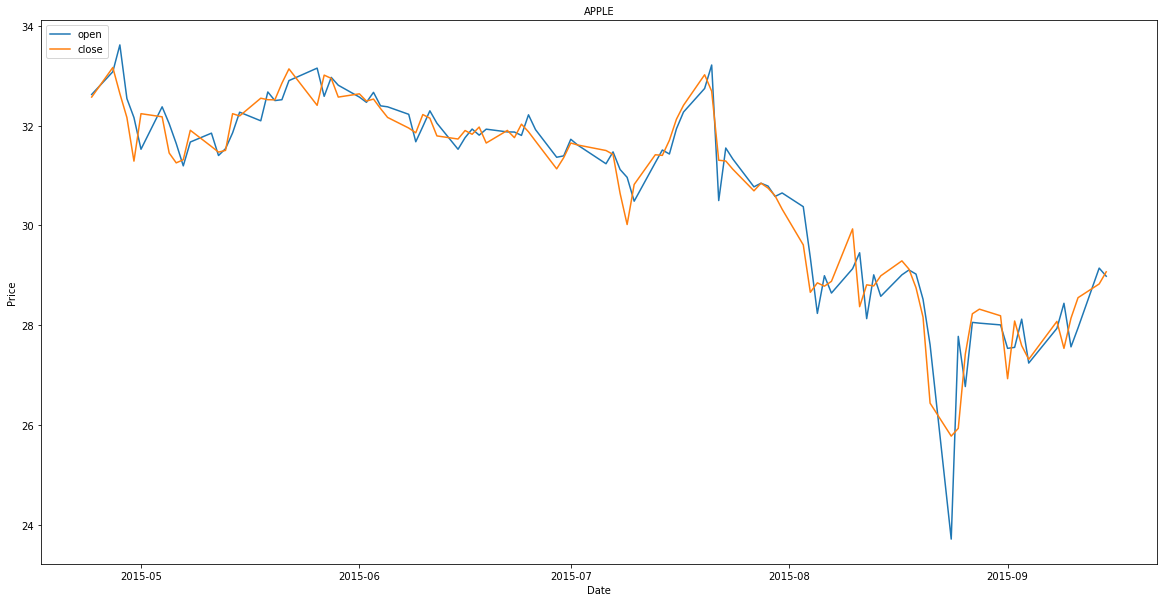

In [12]:
plt.figure(figsize = (20,10))

plt.title("APPLE",fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Date',fontsize = 10)
plt.ylabel('Price',fontsize = 10)
plt.plot(df.iloc[0:100]['Open']['AAPL'],label = 'open')
plt.plot(df.iloc[0:100]['Close']['AAPL'],label = 'close')
plt.legend(loc = 'upper left')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

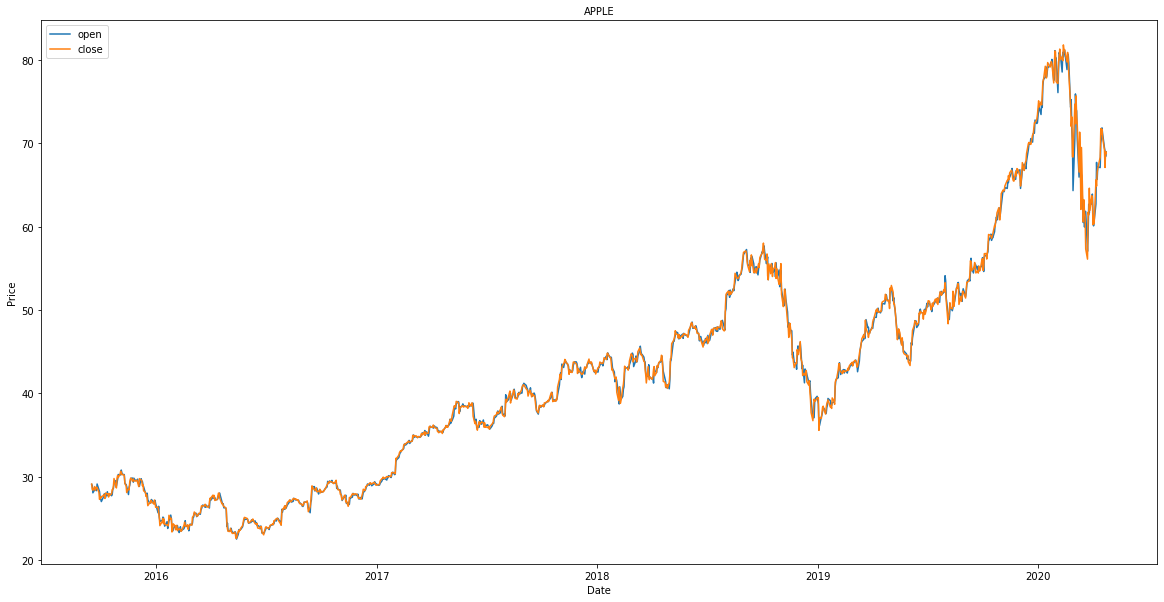

In [13]:
#### last 100 days
plt.figure(figsize = (20,10))

plt.title("APPLE",fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Date',fontsize = 10)
plt.ylabel('Price',fontsize = 10)
plt.plot(df.iloc[100:-1]['Open']['AAPL'],label = 'open')
plt.plot(df.iloc[100:-1]['Close']['AAPL'],label = 'close')
plt.legend(loc = 'upper left')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

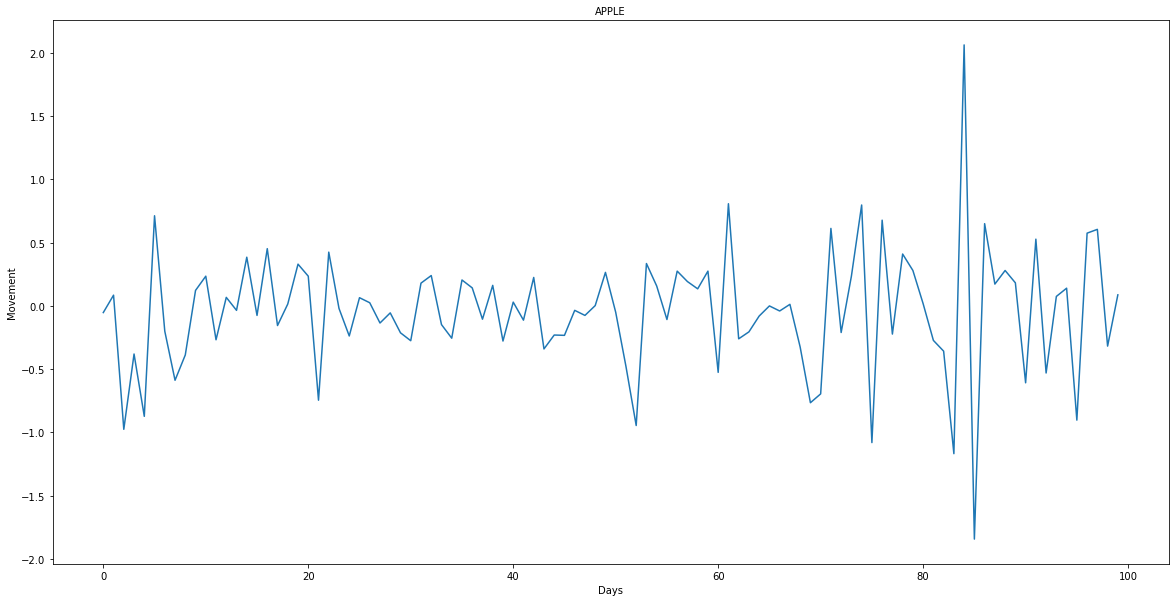

In [14]:
#### movement of apple
plt.figure(figsize = (20,10))

plt.title("APPLE",fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylabel('Movement',fontsize = 10)
plt.xlabel('Days',fontsize = 10)
plt.plot(movements[1][0:100])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

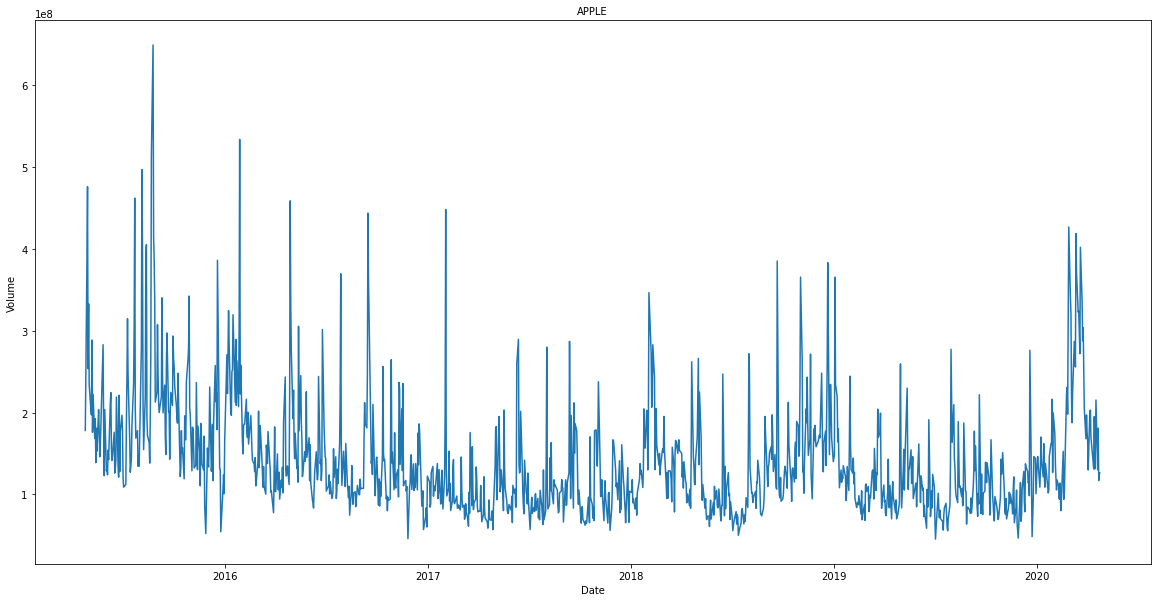

In [15]:
#### The Volumne of apple
plt.figure(figsize = (20,10))

plt.title("APPLE",fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Date',fontsize = 10)
plt.ylabel('Volume',fontsize = 10)
plt.plot(df['Volume']['AAPL'],label = 'volume')

The peak suggest there are high volumes of stocks traded on certain days. This may be due to several situation which may affect the image of the company positively or negetively

#### Normalization

Here we are only considering the APPLE and AMAZON for learning and analysis .We will use all the companies for clustering and for our project.

Stock price of Apple and Amazon have different scales .There is a significant difference in rate of change of units in stock price of Amazon and Apple and in that case we need to normalize our data in order to have consistancy in our data for future analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

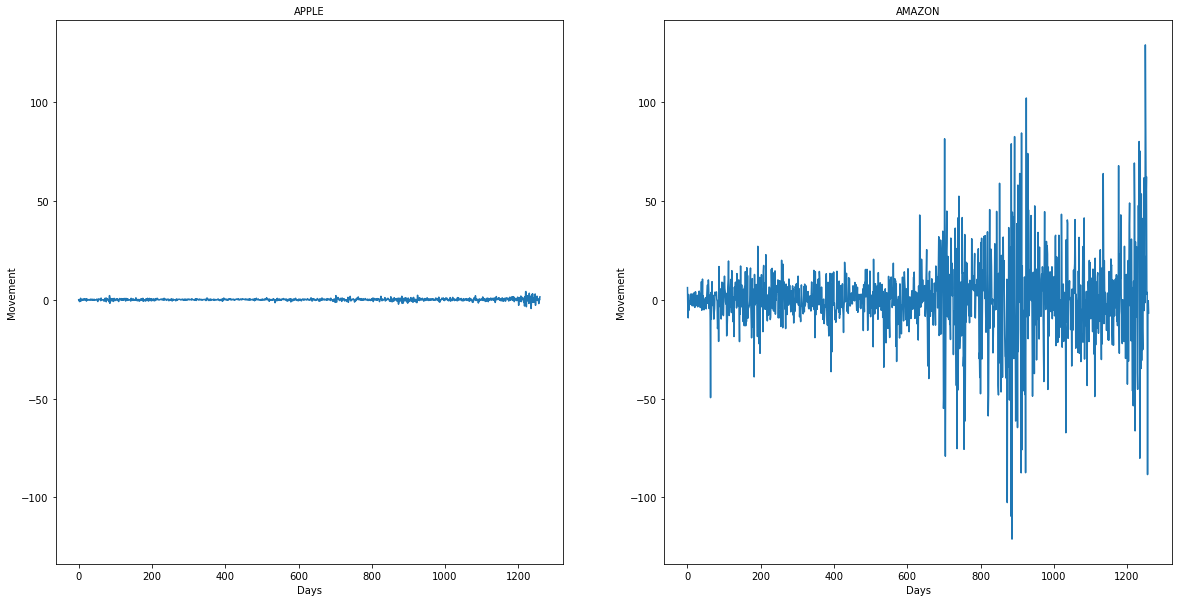

In [16]:
#### checking how apple and amazon (applicable for all companies) have different scales

plt.figure(figsize = (20,10))

#### movement of apple

axis1 = plt.subplot(1,2,1) # have same axis y for both graph
plt.title("APPLE",fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylabel('Movement',fontsize = 10)
plt.xlabel('Days',fontsize = 10)
plt.plot(movements[1])

#### movement of amazon

plt.subplot(1,2,2,sharey = axis1)
plt.title("AMAZON",fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylabel('Movement',fontsize = 10)
plt.xlabel('Days',fontsize = 10)
plt.plot(movements[0])

In [17]:
from sklearn.preprocessing import Normalizer

norm_move = Normalizer().fit_transform(movements) # normalize for all companies

In [18]:
print('minimun : ',norm_move.min())
print('maximum : ',norm_move.max())
print('mean : ',norm_move.mean())

minimun :  -0.3350859880144041
maximum :  0.2655260562450729
mean :  -7.31587389155877e-05


All values are in range (-1,1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

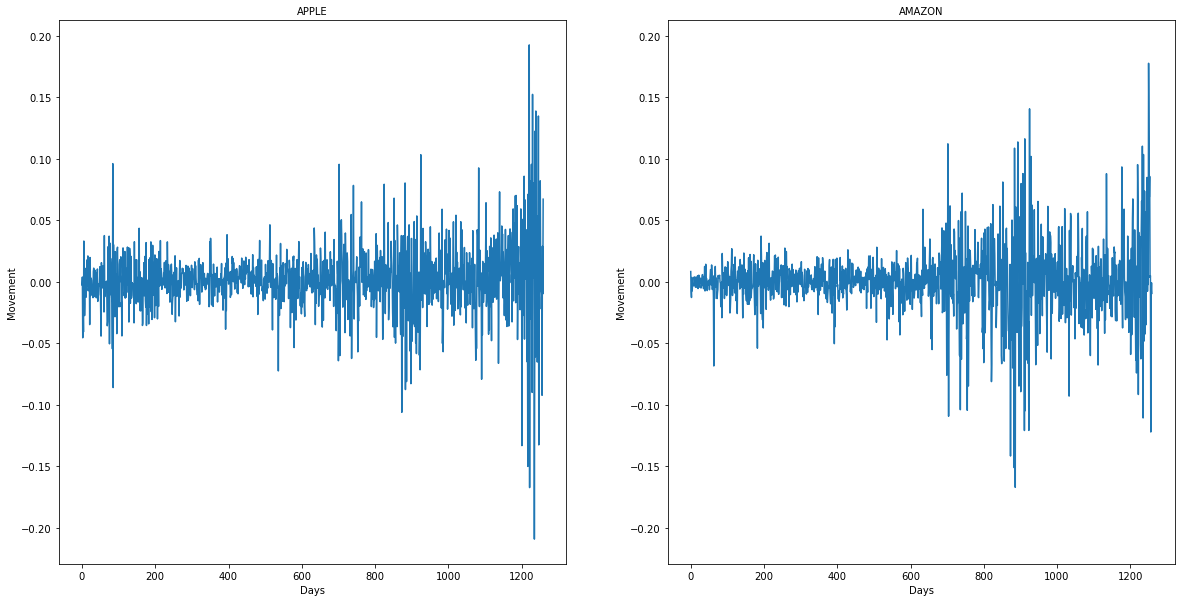

In [19]:
#### checking how apple and amazon (applicable for all companies) have normalized scales

plt.figure(figsize = (20,10))

#### movement of apple

axis1 = plt.subplot(1,2,1) # have same axis y for both graph
plt.title("APPLE",fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylabel('Movement',fontsize = 10)
plt.xlabel('Days',fontsize = 10)
plt.plot(norm_move[1])

#### movement of amazon

plt.subplot(1,2,2,sharey = axis1)
plt.title("AMAZON",fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylabel('Movement',fontsize = 10)
plt.xlabel('Days',fontsize = 10)
plt.plot(norm_move[0])

#### PIPELINE AND KMEAN

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

normalizer = Normalizer()
kmeans = KMeans(n_clusters = 5,max_iter = 1000, random_state = 13)

pipeline = make_pipeline(normalizer,kmeans)

pipeline.fit(movements)
prediction_cluster = pipeline.predict(movements)

In [21]:
prediction_cluster

array([0, 0, 2, 4, 4, 4, 0, 0, 2, 2, 0, 0, 0, 2, 0, 3, 3, 3, 2, 2, 0, 2,
       1, 1, 1, 2, 2])

The cluster for different companies are present in prediction_cluster

In [22]:
df_company = pd.DataFrame({'Cluster':prediction_cluster,'companies':list(companies_dict)})
df_company

<IPython.core.display.Javascript object>

,Cluster,companies
0,0,Amazon
1,0,Apple
2,2,Walgreen
3,4,Northrop Grumman
4,4,Boeing
5,4,Lockheed Martin
6,0,McDonalds
7,0,Intel
8,2,Navient Corporation
9,2,IBM


 ##### Dimension Reduction (PCA)

In [23]:
norm_move.shape

(27, 1260)

Here the data length is 27 but the features are 1260 which is very high. So we are using PCA to reduce dimension of the data to 2 attributtes!

In [38]:
from sklearn.decomposition import PCA

normalizer = Normalizer()

pca_data = PCA(n_components = 2)

kmeans = KMeans(n_clusters = 5,max_iter = 1000, random_state = 13)

pipeline = make_pipeline(normalizer,pca_data,kmeans)

pipeline.fit(movements)
prediction_cluster = pipeline.predict(movements)

df_company = pd.DataFrame({'Cluster':prediction_cluster,'companies':list(companies_dict)}).sort_values(
    by = ['Cluster'],axis = 0)
df_company

<IPython.core.display.Javascript object>

,Cluster,companies
13,0,General Electrics
23,0,Chevron
22,0,Exxon
25,0,Ford
8,0,Navient Corporation
20,1,Alphabet Inc.
12,1,Microsoft
11,1,MasterCard
10,1,Texas Instruments
0,1,Amazon


In [39]:
normal_move = Normalizer().fit_transform(movements)

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(normal_move)
pca_data = pd.DataFrame(pca_data)
pca_data.columns = ['P1', 'P2']

<IPython.core.display.Javascript object>

,P1,P2
0,-0.301423,-0.422650
1,-0.283652,-0.281906
2,0.032074,0.199767
3,-0.328460,0.265331
4,0.031591,-0.084968
5,-0.307024,0.292012
6,-0.074764,0.173099
7,-0.222599,-0.167276
8,0.479191,-0.112538
9,0.097215,0.033015


##### Plots for cluster

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

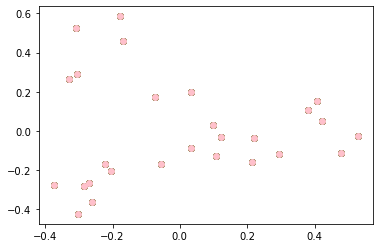

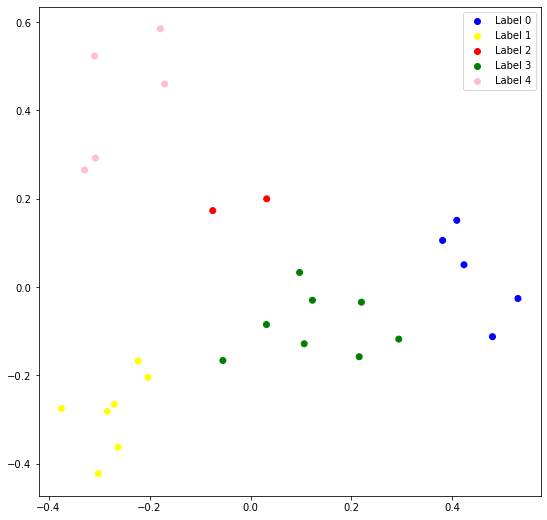

In [44]:
normal_move = Normalizer().fit_transform(movements)

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(normal_move)
pca_data = pd.DataFrame(pca_data)
pca_data.columns = ['P1', 'P2']

kmeans = KMeans(n_clusters = 5,max_iter = 1000, random_state = 13)
kmeans.fit(pca_data)

# Training the model and Storing the predicted cluster labels
labels_rbf = kmeans.predict(pca_data)

# Building the label to colour mapping
colours = {}
colours[0] = 'blue'
colours[1] = 'yellow'
colours[2] = 'red'
colours[3] = 'green'
colours[4] = 'pink'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]
  
# Plotting the clustered scatter plot
  
b = plt.scatter(pca_data['P1'], pca_data['P2'], color ='blue');
y = plt.scatter(pca_data['P1'], pca_data['P2'], color ='yellow');
r = plt.scatter(pca_data['P1'], pca_data['P2'], color ='red');
g = plt.scatter(pca_data['P1'], pca_data['P2'], color ='green');
p = plt.scatter(pca_data['P1'], pca_data['P2'], color ='pink');
  
plt.figure(figsize =(9, 9))
plt.scatter(pca_data['P1'], pca_data['P2'], c = cvec)
plt.legend((b, y, r, g, p), ('Label 0', 'Label 1', 'Label 2','Label 3','Label 4'))
plt.show()